# Assignment Sesi 26
Di tugas ini, akan dianalisis data berdasarkan [dataset ini](https://www.kaggle.com/datasets/jboysen/london-crime).

Sebelum memulai penganalisisannya, saya ingin melihat kolerasi antar setiap data numerical yang ada pada dataset.

Berdasarkan dataset tersebut, saya ingin melihat persebaran jumlah kasus kriminal pada London Raya per tahunnya. 

Lalu, saya ingin melihat keterhubungan antara setiap daerah yang ada pada London Raya terhadap jumlah kriminalitas yang terjadi dimana saya juga ingin melihat daerah mana saja yang memiliki tingkat kriminalitas yang tinggi.

Terakhir, saya ingin mengetahui berapa banyak kejadian kriminal per kategori, baik berdasarkan Major maupun Minor dan persebaran banyak jumlah kasus kriminal per bulan setiap tahunnya.

Berdasarkan tujuan diatas, saya akan membuat beberapa plot yakni :
- Heatmap
- Area Chart
- Pie Plot
- Bar Plot
- Histogram
- Box Plot


In [107]:
# Importing Needed Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import folium

In [133]:
# Importing data into DataFrame
df = pd.read_csv('dataset/london_crime_by_lsoa.csv')
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [4]:
# Checking Info Type Data of the Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [5]:
# Checking Duplicated Data
df.duplicated().value_counts()

False    13490604
Name: count, dtype: int64

In [6]:
# Checking Null Data
df.isnull().mean()

lsoa_code         0.0
borough           0.0
major_category    0.0
minor_category    0.0
value             0.0
year              0.0
month             0.0
dtype: float64

In [7]:
# Checking Value per Columns
for cols in df.columns:
    print(df[cols].value_counts())
    print('\n')

lsoa_code
E01003689    3456
E01003783    3456
E01001010    3456
E01001043    3456
E01004735    3456
             ... 
E01001101    1836
E01000001    1728
E01032775    1728
E01000002    1080
E01000003     648
Name: count, Length: 4835, dtype: int64


borough
Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster     

In [8]:
# Checking Missing Values Non Null
for cols in df.columns:
    print(df[df[cols] == 'Unknown'] | df[df[cols] == 'unknown'] | df[df[cols] == 'none'] | df[df[cols] == 'None'])

Empty DataFrame
Columns: [lsoa_code, borough, major_category, minor_category, value, year, month]
Index: []
Empty DataFrame
Columns: [lsoa_code, borough, major_category, minor_category, value, year, month]
Index: []
Empty DataFrame
Columns: [lsoa_code, borough, major_category, minor_category, value, year, month]
Index: []
Empty DataFrame
Columns: [lsoa_code, borough, major_category, minor_category, value, year, month]
Index: []
Empty DataFrame
Columns: [lsoa_code, borough, major_category, minor_category, value, year, month]
Index: []
Empty DataFrame
Columns: [lsoa_code, borough, major_category, minor_category, value, year, month]
Index: []
Empty DataFrame
Columns: [lsoa_code, borough, major_category, minor_category, value, year, month]
Index: []


### Heatmap of the Dataset

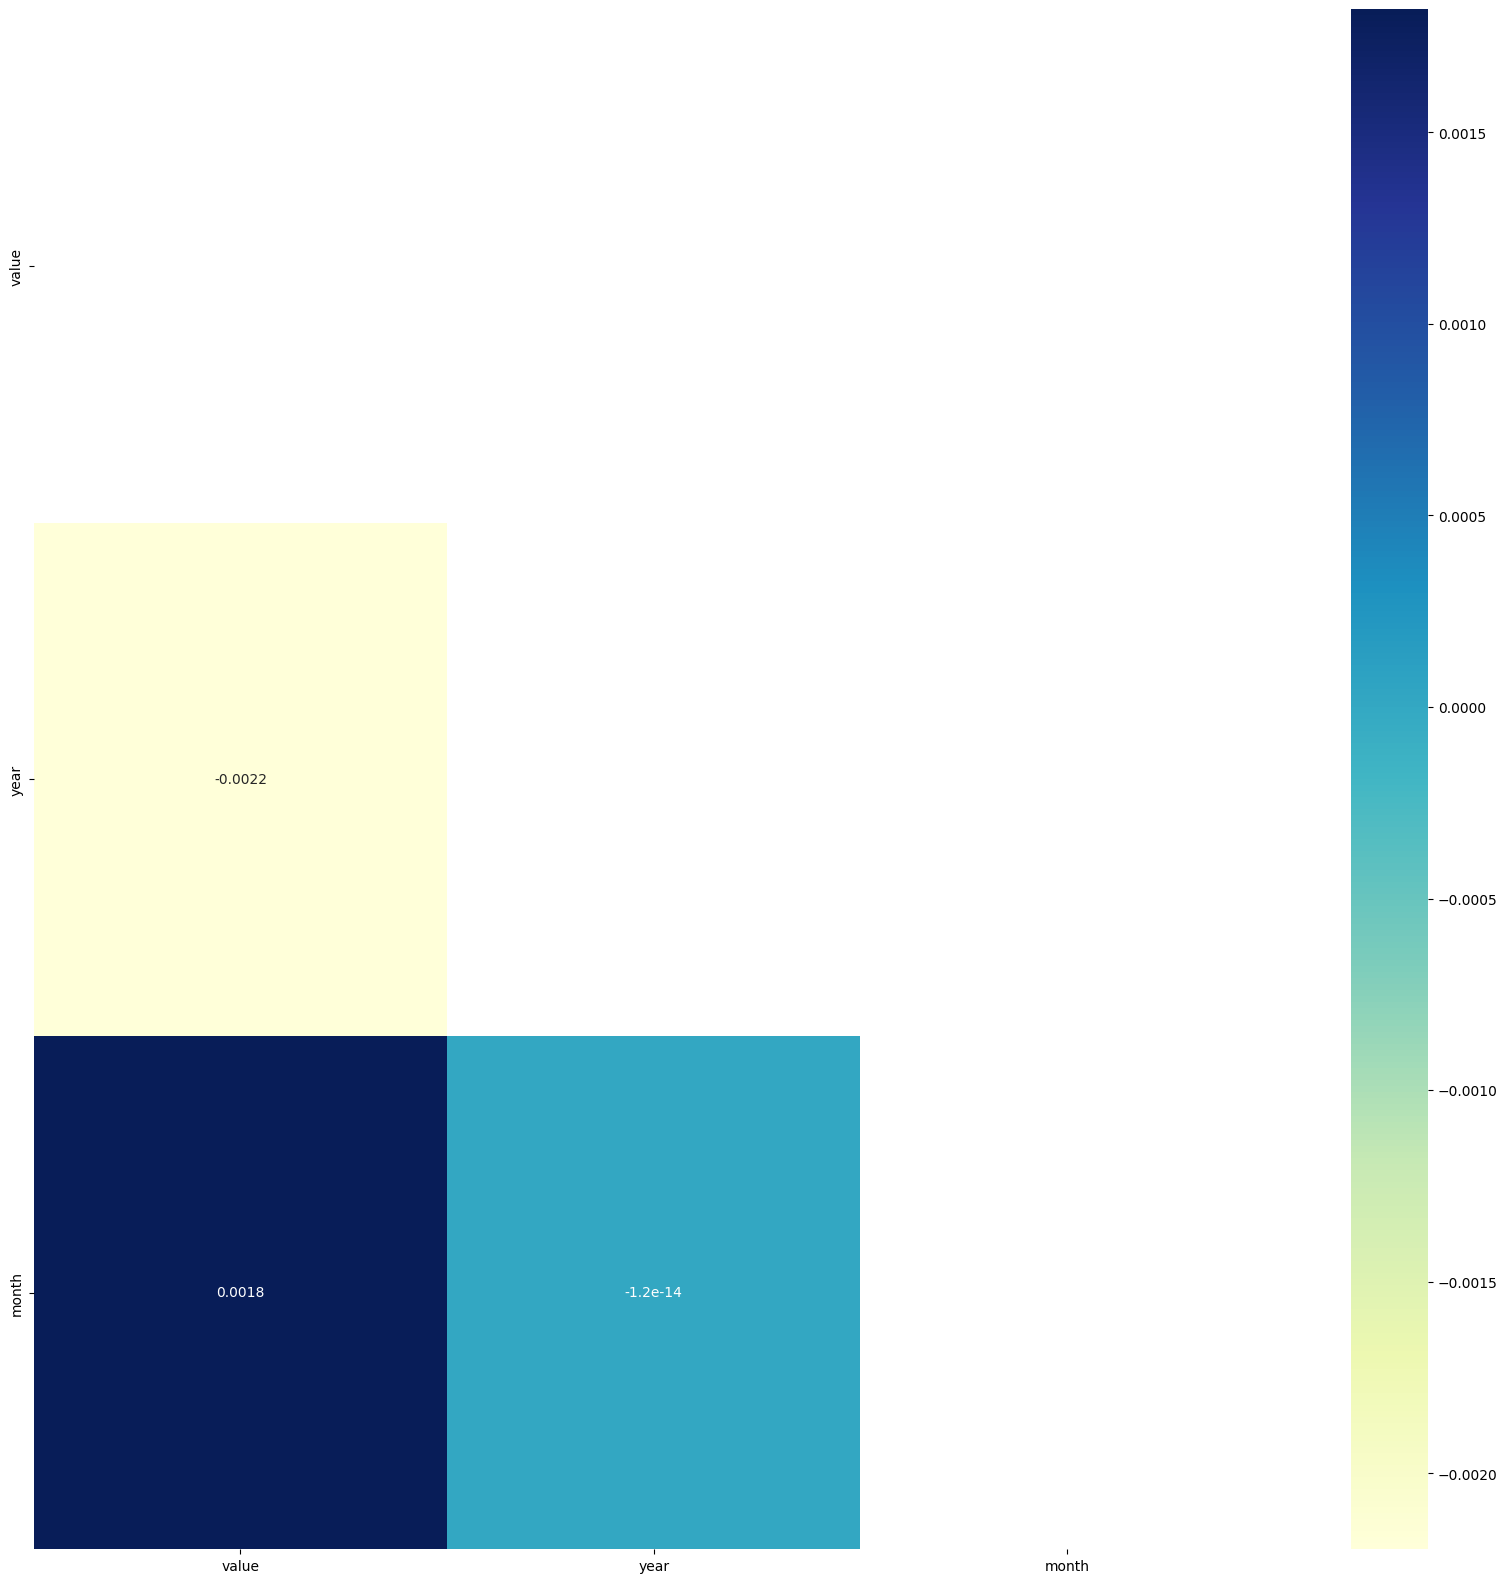

In [9]:
# Creating Heatmap of the Data
num_data= df.select_dtypes(include='number')
fig, ax = plt.subplots(figsize=(20,20))

# Triagular
mask = np.triu(np.ones_like(num_data.corr()))
# Triangle Heatmap
dataplot = sns.heatmap(num_data.corr(), cmap="YlGnBu", annot=True, mask=mask, ax=ax)

plt.show()

### Pie Chart
This chart is for knowing the percentage of criminal case happens in Greater London every year.

If you see the chart, we will know that the criminal cases most happen in 2008.

In [91]:
# Function for Outputing Index and Value of a Column
def val_counts(df, var1, var2):
    counts = df.groupby([var1])[var2].sum().reset_index()
    labels = counts[var1]
    sizes = counts[var2]
    return labels, sizes

labels = val_counts(df, 'year','value')[0]
values= val_counts(df, 'year','value')[1]

explode = (0.05, 0) # Explode the first slice

# Create an Interactive Pie Chart using Plotly
fig = go.Figure(data=[go.Pie(labels=labels, values=values,
                             pull=explode)])

# Adjusting the position of the horizontal legend
fig.update_layout(
    title=dict(text='Persentase Jumlah Kriminal Greater London per Tahun', x=0.5, y=0.95)
)
fig.show()
# sns.histplot(x=df['year'], y=df.groupby(['year'])['value'].sum(), kde=True)

### Area Chart
With this chart, we can show the different in value for top 5 with the most criminal case in Greater London every Year.

First, we must get 5 most values sum from the borough and we get Westminster, Lambeth, Southwark, Camden, and Newham.

After that, we try to only get the data from that 5 borough.

And we can finally make the Area Chart to compare (with See-Through Area Chart) and to see the sum (with Stacked Area Chart).

From the Chart, we know that Westminster is the Area with the Most Criminal Cases in Greater London from 2008-2016.

In [57]:
valueSum = df.groupby(['borough'])['value'].sum().reset_index()
valueSum.sort_values(['value'], ascending=False, axis=0, inplace=True)
valueSum.head()

,borough,value
32,Westminster,455028
21,Lambeth,292178
27,Southwark,278809
5,Camden,275147
24,Newham,262024


In [58]:
max5ValueSum = df[(df['borough'] =='Westminster') |
           (df['borough'] =='Lambeth') | 
           (df['borough'] =='Southwark') |
           (df['borough'] =='Camden') |
           (df['borough'] =='Newham')]

max5Value = max5ValueSum.groupby(['year','borough'])['value'].sum().reset_index(level=1)
max5Value = max5Value.pivot_table(values='value', index=max5Value.index, columns='borough')
max5Value

borough,Camden,Lambeth,Newham,Southwark,Westminster
year,,,,,
2008,32010.0,31717.0,29752.0,33470.0,47846.0
2009,31612.0,31225.0,28610.0,30623.0,48456.0
2010,31804.0,31671.0,30728.0,31320.0,48116.0
2011,33956.0,33224.0,27978.0,30723.0,54243.0
2012,31472.0,33473.0,30067.0,30737.0,59226.0
2013,28435.0,31868.0,27577.0,31128.0,53852.0
2014,27198.0,31765.0,28005.0,28912.0,47564.0
2015,29477.0,33164.0,29217.0,30260.0,47395.0
2016,29183.0,34071.0,30090.0,31636.0,48330.0


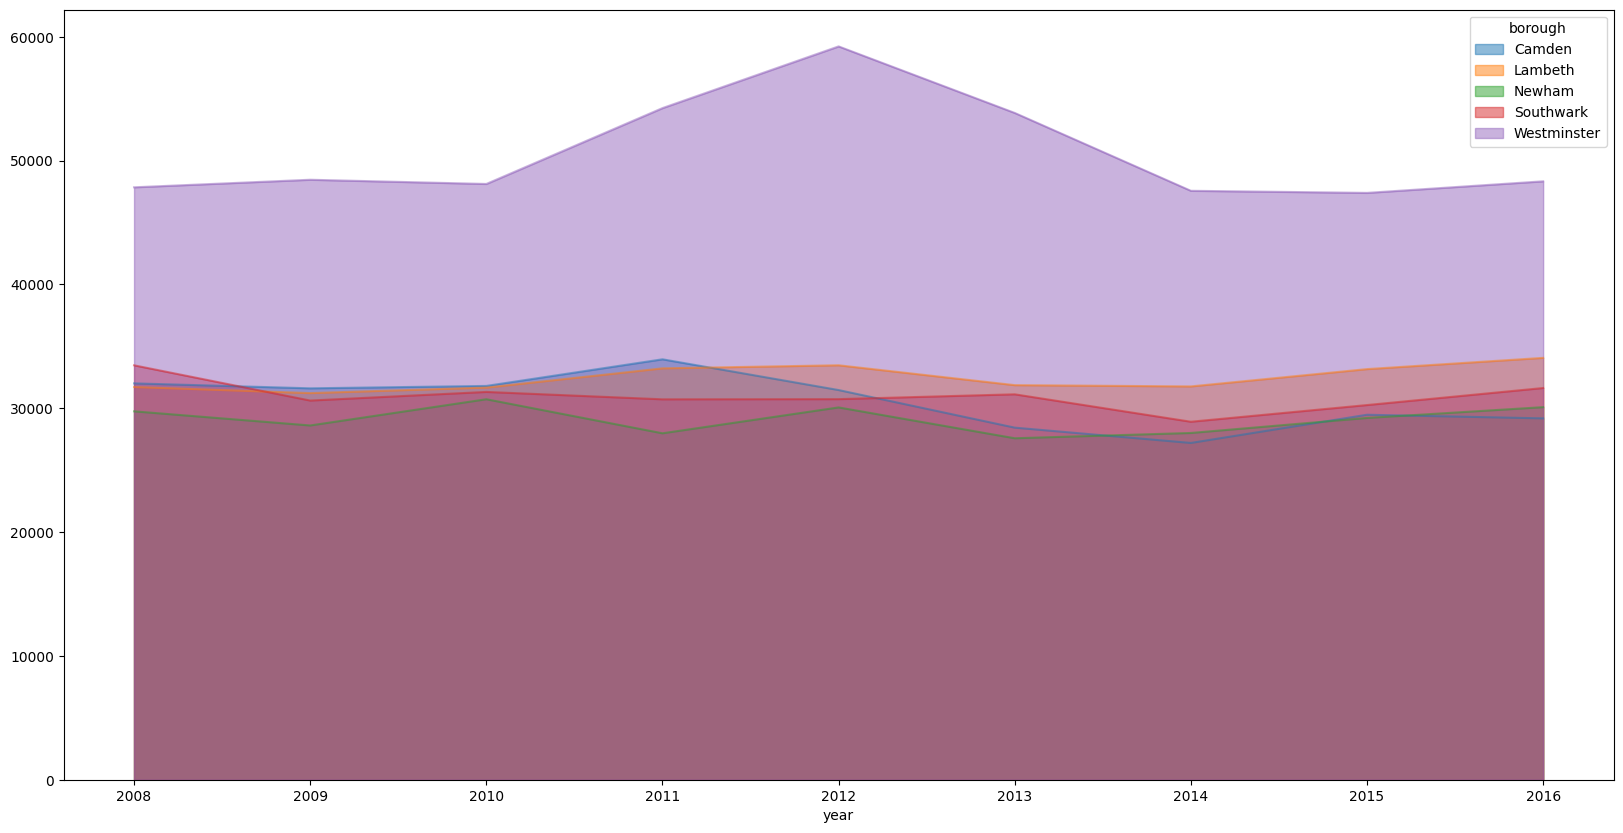

In [54]:
max5Value.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )
plt.show()

Text(0.5, 0, 'Years')

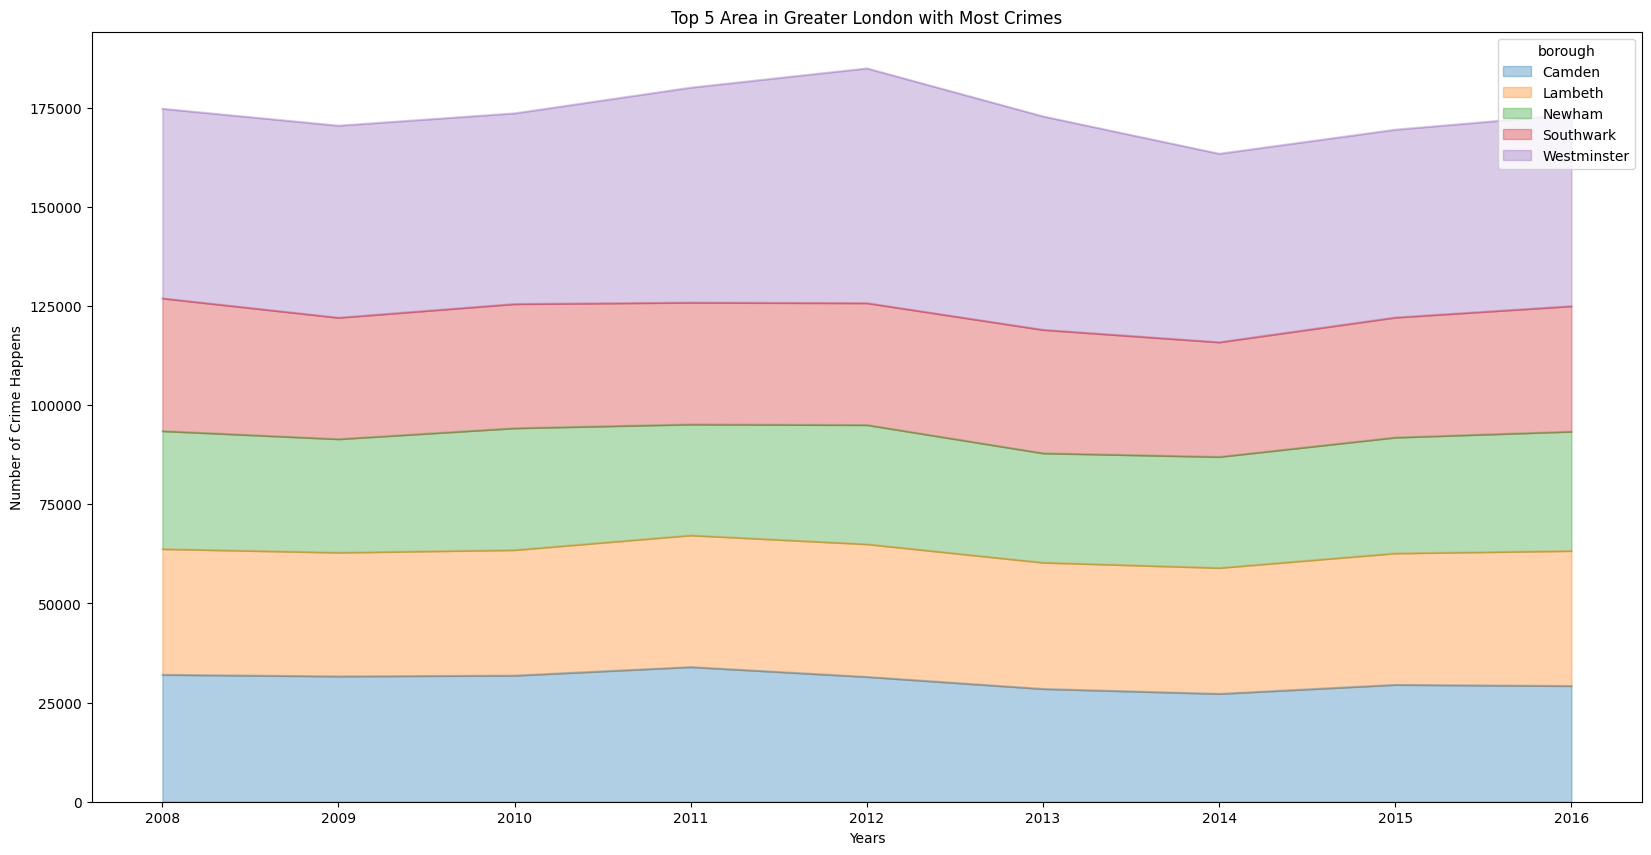

In [129]:
ax = max5Value.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Top 5 Area in Greater London with Most Crimes')
ax.set_ylabel('Number of Crime Happens')
ax.set_xlabel('Years')

### Bar Chart
To know about how mane cases happen per category (Major and Minor), we can see it using Bar Chart.
Because there is some issue where the data is not showing (in this case, there is data that too small compared to others), i try to convert it into using logarithmic scale.

After using logarithmic scale, we can assure that 'Theft and Handling' is the most criminal cases that happen in 2008-2016 where it supported by most cases in 'Other Theft'

##### Bar Chart Normal Scale

<Axes: title={'center': 'Jumlah Kejadian Kriminal per Kategori (2008-2016)'}, ylabel='major_category'>

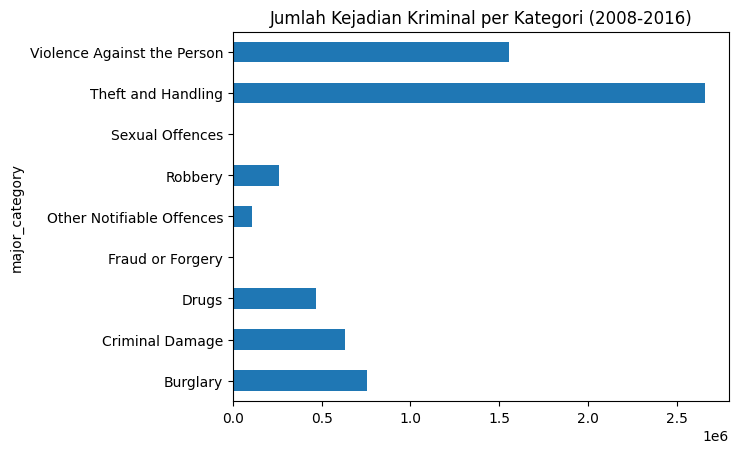

In [137]:
sumMajorCategory = df.groupby(['major_category'])['value'].sum()
sumMajorCategory.plot(kind='barh',title='Jumlah Kejadian Kriminal per Kategori (2008-2016)')


<Axes: title={'center': 'Jumlah Kejadian Kriminal per Kategori Minor (2008-2016)'}, ylabel='minor_category'>

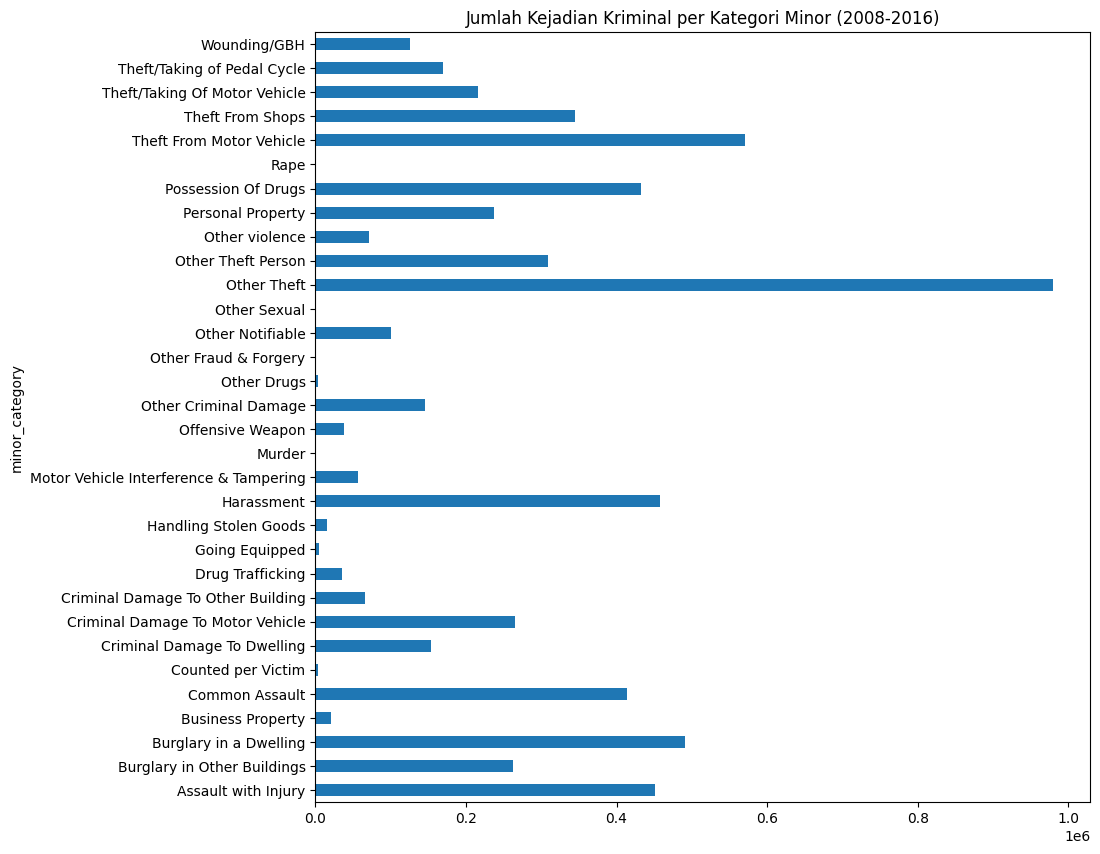

In [138]:
sumMinorCategory = df.groupby(['minor_category'])['value'].sum()
sumMinorCategory.plot(kind='barh',title='Jumlah Kejadian Kriminal per Kategori Minor (2008-2016)', figsize=(10,10))


##### Bar Chart Logarithmic Scale

<Axes: title={'center': 'Jumlah Kejadian Kriminal per Kategori (2008-2016)'}, ylabel='major_category'>

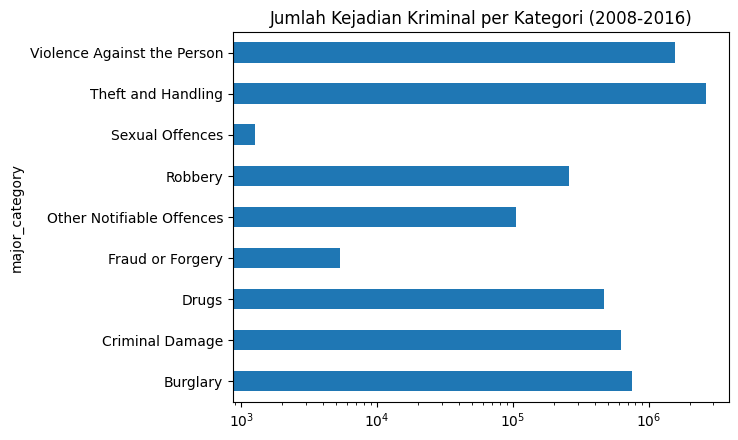

In [141]:
sumMajorCategory.plot(kind='barh',title='Jumlah Kejadian Kriminal per Kategori (2008-2016)',logx=True)

<Axes: title={'center': 'Jumlah Kejadian Kriminal per Kategori Minor (2008-2016)'}, ylabel='minor_category'>

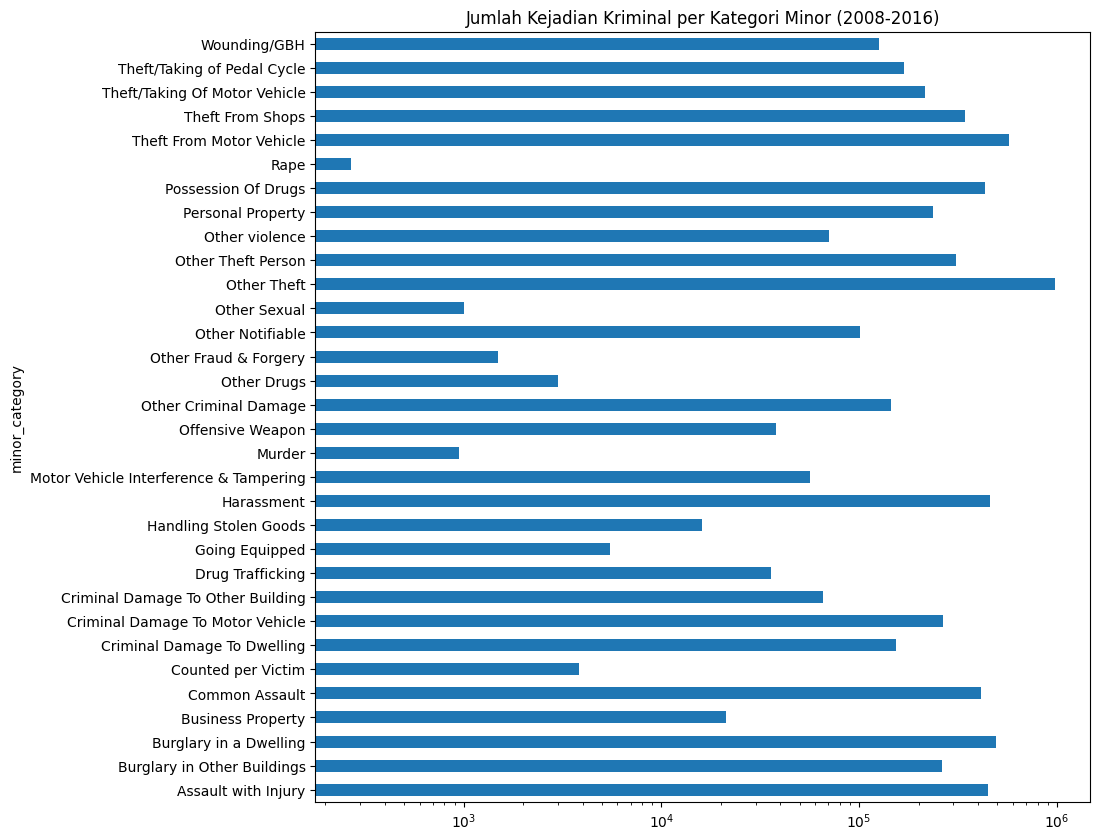

In [139]:
sumMinorCategory.plot(kind='barh',title='Jumlah Kejadian Kriminal per Kategori Minor (2008-2016)',logx=True, figsize=(10,10))


### Histogram
To know about the distributon case that happen for every month per year, we can make a histogram from it.

From the chart, we can get that the total cases happen the most is around 58000 - 60000 cases per month per years.

In [100]:
df['date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))
df

,lsoa_code,borough,major_category,minor_category,value,year,month,date
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,2016-11-01
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,2016-11-01
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,2015-05-01
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,2016-03-01
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,2008-06-01
...,...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2,2015-02-01
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6,2015-06-01
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2,2011-02-01
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5,2011-05-01


d:\Users\bsi80190\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Users\bsi80190\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



[Text(0.5, 1.0, 'Persebaran Banyak Kejadian Kriminal per Waktu')]

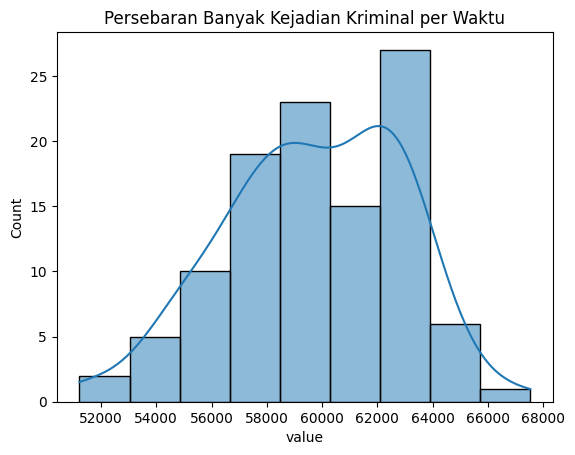

In [131]:
valuePerDate = df.groupby(['date'])['value'].sum()
sns.histplot(x=valuePerDate,kde=True).set(title='Persebaran Banyak Kejadian Kriminal per Waktu')

### Box Plot
To know the statistic about how many cases happen per month per year in Greater London from 2008-2016, we can use Box Plot to know from the Data that we use in Histogram.

<Axes: >

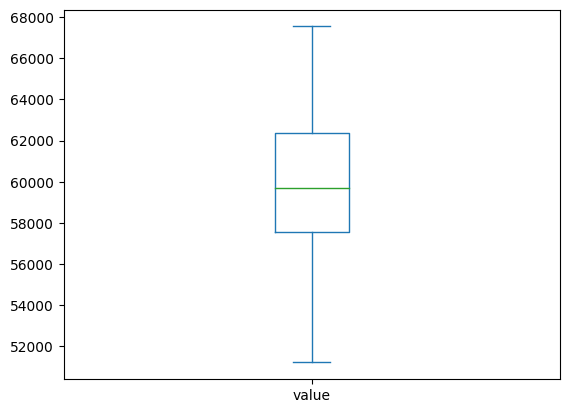

In [145]:
valuePerDateRI = valuePerDate.reset_index()
valuePerDateRI['value'].plot(kind='box')

## Greater London Map

In [147]:
world_map = folium.Map(location=[51.430921,-0.09365], zoom_start = 10)
world_map

# Conclusion

From doing the task, we know that :
- Criminal Cases overall happen the most in 2008 in Greater London area
- The Westminster Area is the area with the most cases in Greater London from 2008-2016 where it happen the most in 2012
- 'Theft and Handling' Major Category is the criminal cases category that happen in Greater London from 2008-2016 with the most cases, where it supported by that minor category which is 'Other Theft'
- Total Cases is mostly around 58000 - 60000 cases per month per years based on the frequency happen